## Nome: Jean Sette Siqueira Vianna  DRE:116027396
## Modelagem Matemática
## Mini-projeto 1 - Cálculo da gravidade a partir de experimentos com pêndulo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path, listdir
from scipy.optimize import curve_fit

# Ensaios com o sensor de luminância

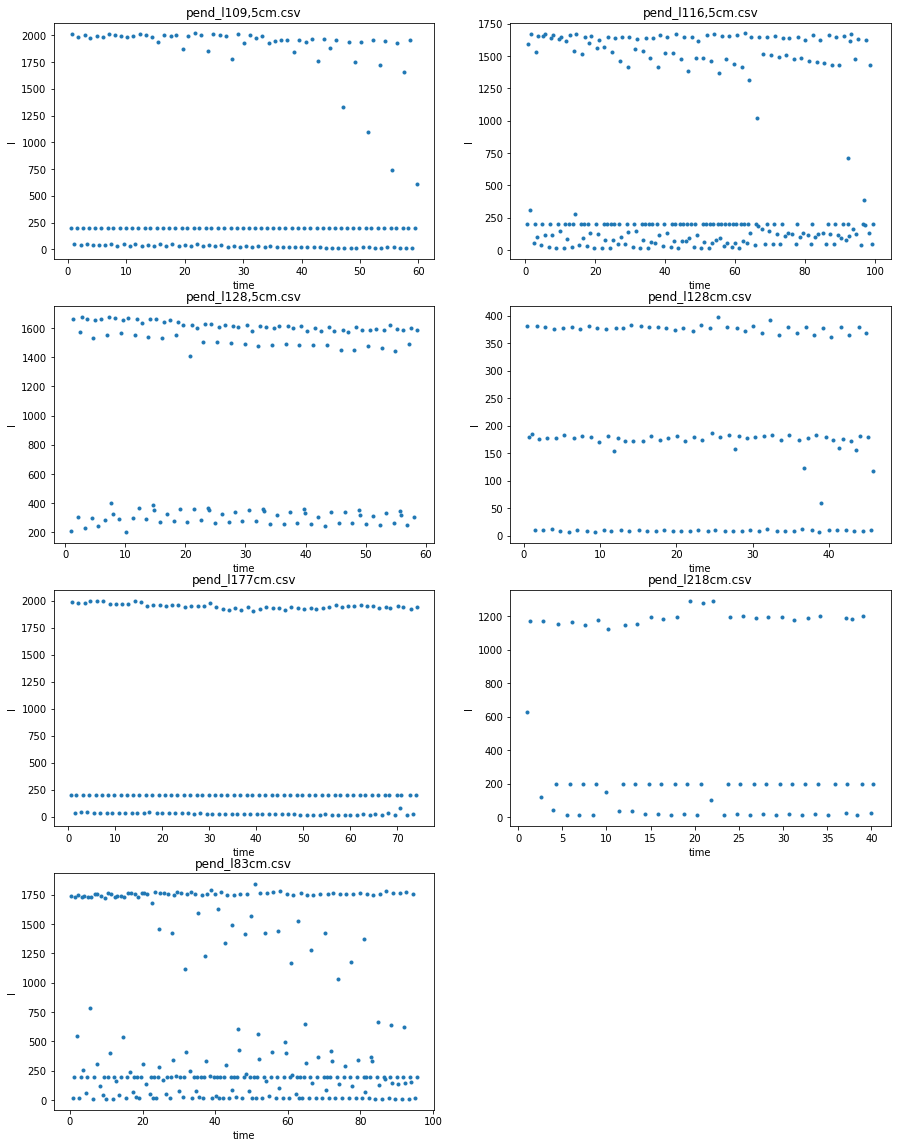

In [8]:
fig = plt.figure(figsize=(15, 20))
place = [421, 422, 423, 424, 425, 426, 427]

arquivos = [f for f in listdir(path.join('pendulo')) if f[:5] == 'pend_']

for arq, n in zip(arquivos, place):
    arquivo = path.join('pendulo', arq)
    df = pd.read_csv(arquivo, header=[0,1])
    
    #Gera gráfico
    subplot = fig.add_subplot(n)
    subplot.plot(df[df.columns[0]],df[df.columns[1]],'.')
    subplot.set(title=arq, xlabel=df.columns[0][0], ylabel=df.columns[1][0])

#Exibe figura
plt.show()

Periodo medio para o experimento pend_l109,5cm.csv: 2.10190990990991
Periodo medio para o experimento pend_l116,5cm.csv: 2.1959322033898308
Periodo medio para o experimento pend_l128,5cm.csv: 1.7298030303030303
Periodo medio para o experimento pend_l128cm.csv: 2.190641975308642
Periodo medio para o experimento pend_l177cm.csv: 2.666128440366972
Periodo medio para o experimento pend_l218cm.csv: 3.0123599999999997
Periodo medio para o experimento pend_l83cm.csv: 2.0054787234042553


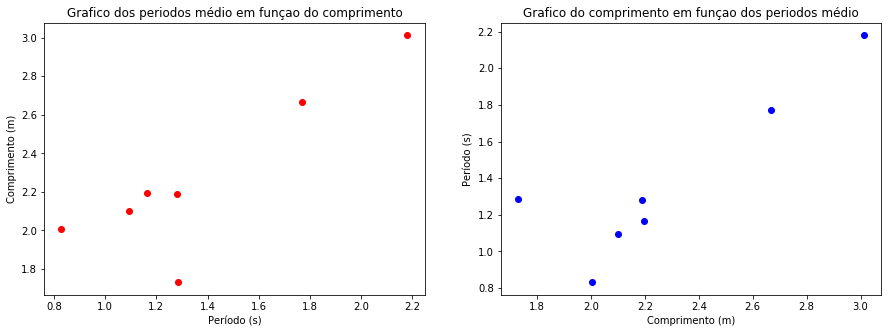

In [11]:
#Cálculo dos peíodos médios para fazer os gráficos de comprimento x período

amostra_periodos_e1 = len(arquivos)*[[]] #Uma lista auxiliar vazia para cada arquivo para posterior análise dos erros
fig = plt.figure(figsize=(15, 5))

subplot1 = fig.add_subplot(121)
subplot2 = fig.add_subplot(122)

comprimentos = [1.095, 1.165, 1.285, 1.28, 1.77, 2.18, 0.83]
periodos= []

for arq, n in zip(arquivos, range(len(arquivos))):    
    arquivo = path.join('pendulo', arq)
    df = pd.read_csv(arquivo, header=[0,1])
    amostra_periodos_e1[n] = []
    
    temposmax = []
    temposmin = []
    for x,y in zip(df[df.columns[0]],df[df.columns[1]]):
        if arq == 'pend_l128,5cm.csv':
            if y >800:
                temposmax.append(x)
            if y <800:
                temposmin.append(x)
    
        else:
            if y >250:
                temposmax.append(x)
            if y <150:
                temposmin.append(x)

    #cria listas para as diferencas dos tempos maximos e minimos
    aux_periodos = []
    j=len(temposmax)
    for i in range(j):
        if i < j-1:
            aux_periodos.append(2*(temposmax[i+1] - temposmax[i])) #Os tempos (temposmax[i+1] - temposmax[i]) sao meio periodo, logo multiplicamos por 2
            amostra_periodos_e1[n].append((temposmax[i+1] - temposmax[i])) #Salvando os meios-periodos dos maximos na lista para o histograma 

    m = len(temposmin)
    for k in range(m):
        if k < m-1:
            aux_periodos.append(2*(temposmin[k+1] - temposmin[k])) #Os tempos (temposmin[k+1] - temposmax[k]) sao meio periodo, logo multiplicamos por 2
            amostra_periodos_e1[n].append((temposmin[k+1] - temposmin[k])) #Salvando os meios-periodos dos minimos na lista para o histograma 

    #Calcula o periodo médio de oscilação do pendulo:  
    periodo_medio = np.mean(aux_periodos)
    periodos.append(periodo_medio)

    print("Periodo medio para o experimento "+ arq +":", periodo_medio)
    
subplot1.plot(comprimentos, periodos, 'ro')
subplot1.set(title='Grafico dos periodos médio em funçao do comprimento', xlabel='Período (s)', ylabel='Comprimento (m)')

subplot2.plot(periodos, comprimentos, 'bo')
subplot2.set(title='Grafico do comprimento em funçao dos periodos médio', xlabel='Comprimento (m)', ylabel='Período (s)')

plt.show()

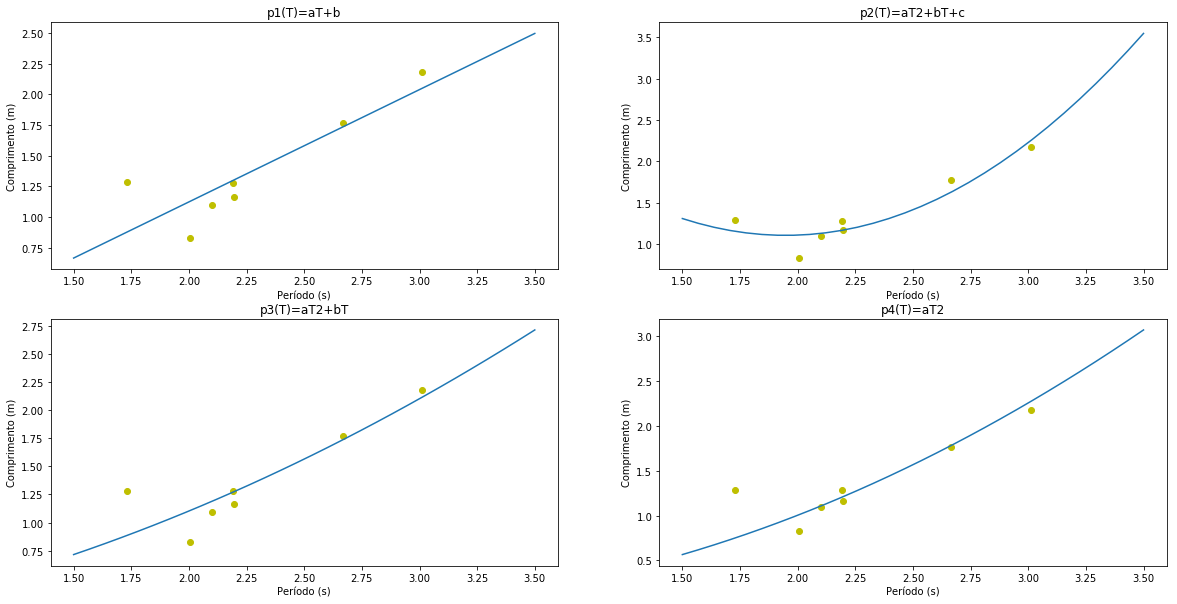

In [12]:
def ajustes(per, comp):
    #Retorna os ajustes lineares e quadráticos
    
    fig = plt.figure(figsize=(20, 10))
    
    subplot1 = fig.add_subplot(221)
    subplot2 = fig.add_subplot(222)
    subplot3 = fig.add_subplot(223)
    subplot4 = fig.add_subplot(224)

    #𝑝1(𝑇)=a𝑇+b 
    def f(t, a, b): return a*t + b
    a_opt, b_opt = curve_fit(f,periodos, comprimentos)[0]
    subplot1.plot(periodos, comprimentos, 'yo')
    subplot1.plot(np.linspace(1.5,3.5,30), [f(t,a_opt, b_opt) for t in np.linspace(1.5,3.5,30)])
    subplot1.set(title='p1(T)=aT+b', xlabel='Período (s)', ylabel='Comprimento (m)')
    
    #𝑝2(𝑇)=𝑎𝑇2+𝑏𝑇+𝑐
    def g(t, a, b, c): return a*t**2 + b*t + c    
    a_opt, b_opt, c_opt = curve_fit(g,periodos, comprimentos)[0]
    subplot2.plot(periodos, comprimentos, 'yo')
    subplot2.plot(np.linspace(1.5,3.5,30), [g(t,a_opt, b_opt, c_opt) for t in np.linspace(1.5,3.5,30)])
    subplot2.set(title='p2(T)=aT2+bT+c', xlabel='Período (s)', ylabel='Comprimento (m)')
    
    #𝑝3(𝑇)=𝑎𝑇2+𝑏𝑇 
    def h(t, a, b): return a*t**2 + b*t    
    a_opt, b_opt = curve_fit(h,periodos, comprimentos)[0]
    subplot3.plot(periodos, comprimentos, 'yo')
    subplot3.plot(np.linspace(1.5,3.5,30), [h(t,a_opt, b_opt) for t in np.linspace(1.5,3.5,30)])    
    subplot3.set(title='p3(T)=aT2+bT', xlabel='Período (s)', ylabel='Comprimento (m)')
    
    #𝑝4(𝑇)=𝑎𝑇2 
    def i(t, a): return a*t**2    
    a_opt = curve_fit(i,periodos, comprimentos)[0]
    subplot4.plot(periodos, comprimentos, 'yo')
    subplot4.plot(np.linspace(1.5,3.5,30), [i(t,a_opt) for t in np.linspace(1.5,3.5,30)])
    subplot4.set(title='p4(T)=aT2', xlabel='Período (s)', ylabel='Comprimento (m)')
    
    plt.show()
    
ajustes(periodos, comprimentos)

In [13]:
#Cálculo da Gravidade pelo modelo linear a partir da regressão feita em cima dos periodos medios e comprimentos
def f(t, a): return a*t**2

constante = curve_fit(f,periodos, comprimentos)[0][0]
gravidade_media = constante*4*np.pi**2

print('gravidade média:', gravidade_media)

gravidade média: 9.903944210314659


### Comentários

Podemos ver que dentre os ajustes, aparentemente nenhum deles se ajusta adequandamente. Mas, os ajustes quadráticos por possuírem mais termos ajustáveis entregam uma curva mais fiel aos dados obitidos e, embora saibamos que a lei que rege o experimento segue a regressão p4, é a regressao p2 que melhor se ajusta aos dados, o que mostra que provavelmente alguns pontos deveriam ser descartados antes de fazer a regressão por serem outliers.

Utilizando a regressão p4, conseguimos calcular a gravidade e achamos o valor 9,904 que é bem próximo do valor tabelado, mesmo com os dados não se ajustando adequandamente à curva utilizada, no qual obtivemos a constante necessaria para o cálculo da gravidade.

### Análise da propagação dos erros:

- Para cada comprimento:

	     Dados do arquivo: pend_l109,5cm.csv
Média Amostral = 1.050955, Desvio Padrão Amostral = 0.064750,
Desvio Padrão Amostral = 0.006146, Erro Relativo = 0.005848
 
Gravidade calculada = 9.784658221944138
Intervalo de confiança para a gravidade = [7.844884563617575, 11.7244318802707]
Erro estimado = 19.824644%

---------------------------------------------------------------

	     Dados do arquivo: pend_l116,5cm.csv
Média Amostral = 1.097966, Desvio Padrão Amostral = 0.358843,
Desvio Padrão Amostral = 0.026972, Erro Relativo = 0.024566
 
Gravidade calculada = 9.537791112127993
Intervalo de confiança para a gravidade = [4.68627445171821, 14.389307772537775]
Erro estimado = 50.866250%

---------------------------------------------------------------

	     Dados do arquivo: pend_l128,5cm.csv
Média Amostral = 0.864902, Desvio Padrão Amostral = 0.329421,
Desvio Padrão Amostral = 0.028672, Erro Relativo = 0.033151
 
Gravidade calculada = 16.953897658448113
Intervalo de confiança para a grav

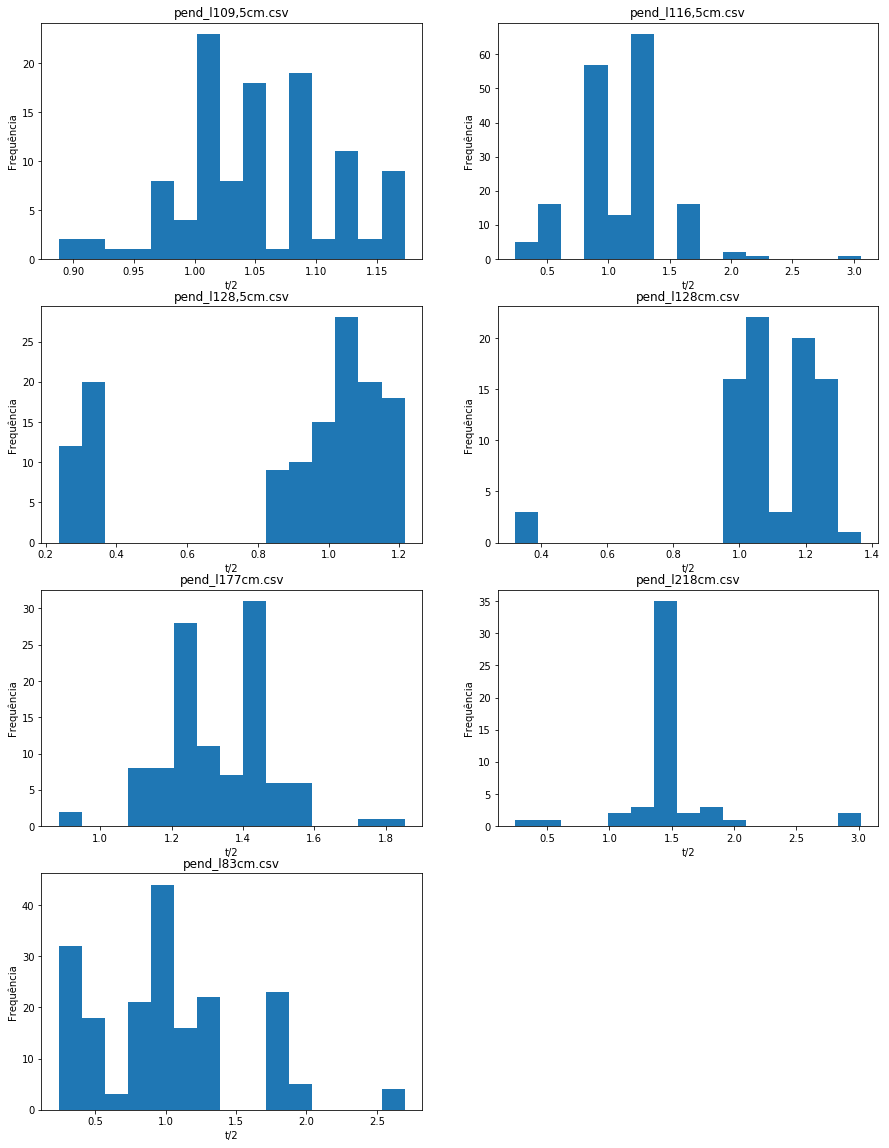

In [15]:
def estimativa(t,l,erroRelativo_t,erroRelativo_l):  #Funcao que calacula a propagação do erro para o calculo da gravidade             
    return (l*erroRelativo_t*2*np.pi**2)/(t**3) + erroRelativo_l*(np.pi/t)**2

fig = plt.figure(figsize=(15, 20))
place = [421, 422, 423, 424, 425, 426, 427]


             
gravidades = [(comprimentos[i]*4*np.pi**2)/((periodos[i])**2) for i in range(len(periodos))] #Calculando a gravidade de acordo com a amostra referente a cada comprmento  
intervalos = [] #Lista para os intervalos de confianaça para as gravidades
    
for arq, n, l, subp in zip(arquivos, range(len(arquivos)), comprimentos, place):
       
    N = len(amostra_periodos_e1[n])                                           #números de T/2 medidos (tamanho da amostra)
    mean = sum(amostra_periodos_e1[n])/N                                      #T/2 médio da amostra
    std = (sum([(q - mean)**2 for q in amostra_periodos_e1[n]])/(N-1))**0.5   #Desvio padrao amostral
    st_error = std/(N**0.5)                                                   #Erro padrao amostral
    erroRelativo_t = st_error/mean                                            #Erro relativo da amostra de T/2 
    erroRelativo_l = 0.01                                                     #Erro relativo do comprimento
    estimRelativa = estimativa(t=mean, l=l, erroRelativo_t=erroRelativo_t, erroRelativo_l=erroRelativo_l) #Calculo da propagação de erro para o calculo da gravidade
    
    intervalos.append([gravidades[n]*(1-estimRelativa), gravidades[n]*(1+estimRelativa)]) #Intervalos de confiança
    
    #Gera histograma
    subplot = fig.add_subplot(subp)
    subplot.hist(amostra_periodos_e1[n], bins=15)
    subplot.set(title=arq, xlabel='t/2', ylabel='Frequência')
    print('\t     Dados do arquivo: %s' %(arq))
    print('Média Amostral = %f, Desvio Padrão Amostral = %f,\nDesvio Padrão Amostral = %f, Erro Relativo = %f\n ' %(mean, std, st_error, erroRelativo_t))
    
    print('Gravidade calculada =', gravidades[n])
    print('Intervalo de confiança para a gravidade =', [gravidades[n]*(1-estimRelativa), gravidades[n]*(1+estimRelativa)])
    print('Erro estimado = %f%%\n' %(100*estimRelativa))
    print('---------------------------------------------------------------\n')
    
plt.show()

### Comentários

Apesar de termos achado bons valores para a gravidade, foi encontrado uma propagação de erro muito grande fazendo com que os intervalos de confiança tenham também comprimentos grandes. O que pode ter sido causado por um mal tratamento dos dados, ou pelo cáculo errado dos erros e consequentemente do intervalo, ou de fato é o que ocorre com a amostra. Diante disso, é fácil ver que  todos os intervalos encontrados incluem o valor tabelado da gravidade.

- Usando todos os comprimentos:

In [16]:
#Achando a constante:
def f(t, a): return a*(2*t)**2      

amostra_periodos_e1_totais = []
for i in amostra_periodos_e1:
    amostra_periodos_e1_totais+=[np.mean(i)] 

constante = curve_fit(f,amostra_periodos_e1_totais, comprimentos)[0][0]

#Calculo da propagação do erro para a(t,l):
def estimativa(t,l,erroRelativo_t,erroRelativo_l):  #Funcao que calacula a propagação do erro para o calculo da gravidade  
    return l*erroRelativo_t/(2*(t**3)) +  erroRelativo_l/((2*t)**2)

#Calculo da gravidade a partir de a(t,l):
gravidade = constante*4*np.pi**2

N = len(amostra_periodos_e1_totais)                                                   #números de T/2 medidos (tamanho da amostra)
comprimento_medio = np.mean(comprimentos)                                             #comprimento médio
periodo_medio = np.mean(amostra_periodos_e1_totais)                                   #período médio (tamanho da amostra)
std = (sum([(q - periodo_medio)**2 for q in amostra_periodos_e1_totais])/(N-1))**0.5  #Desvio padrao amostral
st_error = std/(N**0.5)                                                               #Erro padrao amostral
erroRelativo_t = st_error/periodo_medio                                               #Erro relativo da amostra de T/2 
erroRelativo_l = 0.01             
estimRelativa = estimativa(periodo_medio, comprimento_medio, erroRelativo_t=erroRelativo_t, erroRelativo_l=erroRelativo_l)
intervalo = [(1-estimRelativa)*gravidade, (1+estimRelativa)*gravidade]

print('\t     Dados do arquivo: %s' %(arq))
print('Média Amostral = %f, Desvio Padrão Amostral = %f,\nDesvio Padrão Amostral = %f, Erro Relativo = %f\n ' %(periodo_medio, std, st_error, erroRelativo_t))

print('Gravidade calculada =', gravidade)
print('Intervalo de confiança para a gravidade =', intervalo)
print('Erro estimado = %f%%' %(100*estimRelativa))

	     Dados do arquivo: pend_l83cm.csv
Média Amostral = 1.135875, Desvio Padrão Amostral = 0.215040,
Desvio Padrão Amostral = 0.081278, Erro Relativo = 0.071555
 
Gravidade calculada = 9.903944210314659
Intervalo de confiança para a gravidade = [9.55299223379683, 10.254896186832488]
Erro estimado = 3.543558%


### Comentários

Podemos ver que a gravidade chegou bem próximo do valor tabelado, além disso o erro foi bem baixo. Mas volto a dizer que é possível que o cálculo não tenha sido feito da forma correta, entretanto considerando este erro, o intervalo de confiança também inclui a gravidade tabelada com uma margem de erro bem menor do que qualquer intervalo feito por comprimento separadamente na analise anterior. O que nos faz crer que o método em que calculamos a gravidade a partir de todos os periodos médios e comprimentos é mais preciso do que quando calculamos para cada periodo médio e comprimento separadamente.

## Ensaios com o sensor de proximidade

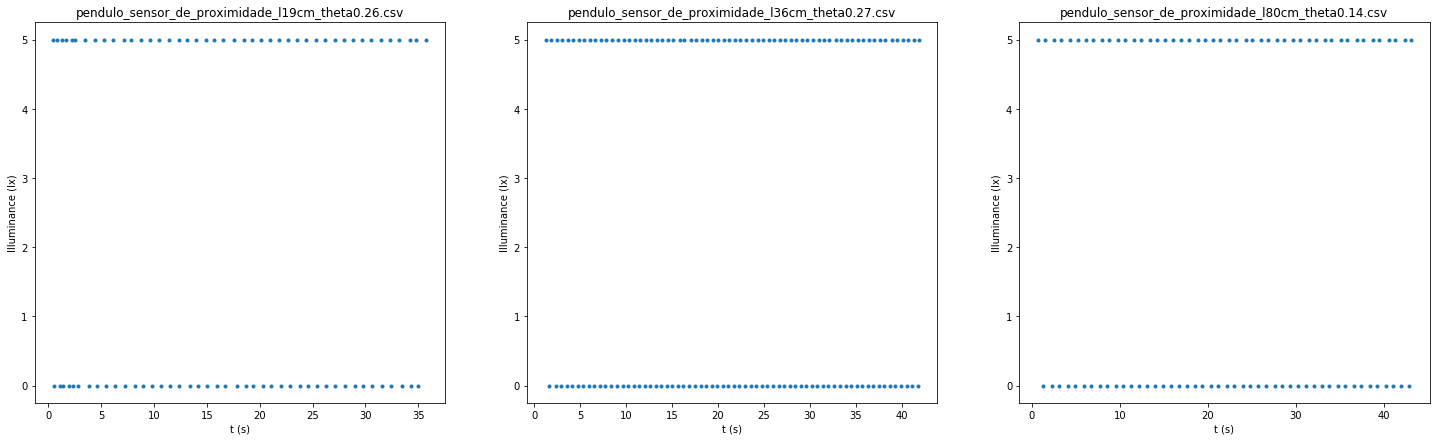

In [19]:
fig = plt.figure(figsize=(25, 7))
place = [131, 132, 133]

arquivos = [f for f in listdir(path.join('pendulo')) if 'pendulo_sensor_de_proximidade' in f]
arquivos = arquivos[1:]

for arq, n in zip(arquivos, place):
    arquivo = path.join('pendulo', arq)
    df = pd.read_csv(arquivo, header=[0,1])
    
    #Gera gráfico
    subplot = fig.add_subplot(n)
    subplot.plot(df[df.columns[0]],df[df.columns[1]],'.')
    subplot.set(title=arq, xlabel=df.columns[0][0], ylabel=df.columns[1][0])
    
plt.show()

Periodo medio para o experimento pendulo_sensor_de_proximidade_l19cm_theta0.26.csv: 1.6408701643388233
Periodo medio para o experimento pendulo_sensor_de_proximidade_l36cm_theta0.27.csv: 1.2133503174135336
Periodo medio para o experimento pendulo_sensor_de_proximidade_l80cm_theta0.14.csv: 1.8058875913784944


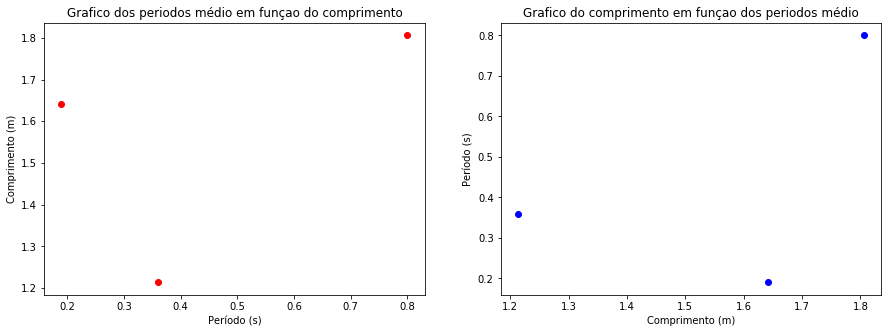

In [21]:
#Cálculo dos peíodos médios para fazer os gráficos de comprimento x período

amostra_periodos_e2 = len(arquivos)*[[]] #Uma lista auxiliar vazia para cada arquivo para posterior análise dos erros
fig = plt.figure(figsize=(15, 5))

subplot1 = fig.add_subplot(121)
subplot2 = fig.add_subplot(122)

comprimentos = [0.19, 0.36, 0.80]
periodos = []
for arq, n in zip(arquivos, range(len(comprimentos))):
    amostra_periodos_e2[n] = []
    arquivo = path.join('pendulo', arq)
    df = pd.read_csv(arquivo, header=[0,1])
    
    #Listas para guardar os tempos em que a iluminancia é maxima e minima
    temposmax = []
    temposmin = []

    for t,y in zip(df[df.columns[0]], df[df.columns[1]]):
        if y==5:
            temposmax.append(t)
        if y==0:
            temposmin.append(t)

    #Lista para guardar o dobro das distancias dos tempos em que a iluminancia é maxima e minima, que é o periodo
    aux_periodos =[]

    #Loops para calcular a distancia dos tempos de maximo e minimo      
    for i in range(len(temposmax)):
        if i < len(temposmax)-1:
            aux_periodos.append(2*(temposmax[i+1] - temposmax[i])) #Os tempos (temposmin[i+1] - temposmin[i]) sao meio periodo, logo multiplicamos por 2
            amostra_periodos_e2[n].append((temposmax[i+1] - temposmax[i])) #Salvando os meios-periodos dos maximos na lista para o histograma 

    m = len(temposmin)
    for k in range(m):
        if k < m-1:
            aux_periodos.append(2*(temposmin[k+1] - temposmin[k])) #Os tempos (temposmax[i+1] - temposmax[i]) sao meio periodo, logo multiplicamos por 2
            amostra_periodos_e2[n].append((temposmin[k+1] - temposmin[k])) #Salvando os meios-periodos dos minimos na lista para o histograma 


    #Calculando o periodo medio geral
    periodo_medio = np.mean(aux_periodos)
    periodos.append(periodo_medio)
    print("Periodo medio para o experimento "+ arq +":", periodo_medio)
    
subplot1.plot(comprimentos, periodos, 'ro')
subplot1.set(title='Grafico dos periodos médio em funçao do comprimento', xlabel='Período (s)', ylabel='Comprimento (m)')

subplot2.plot(periodos, comprimentos, 'bo')
subplot2.set(title='Grafico do comprimento em funçao dos periodos médio', xlabel='Comprimento (m)', ylabel='Período (s)')

plt.show()

C:\Users\JEAN\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


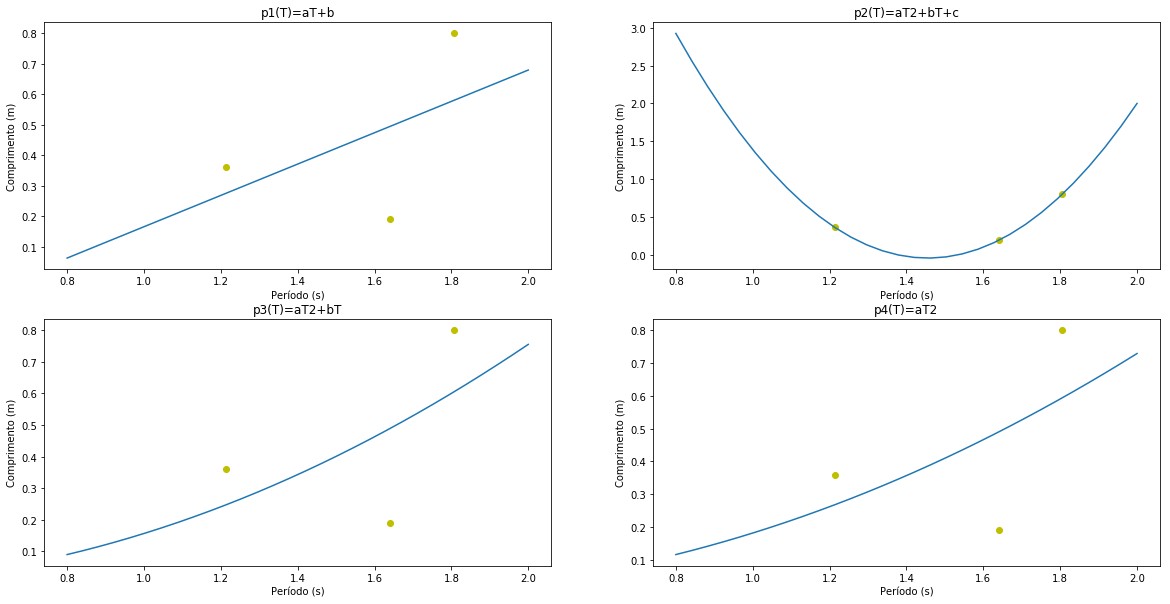

In [22]:
#Testando diferentes ajustes

def ajustes(per, comp):
    #Retorna os ajustes lineares e quadráticos
    
    fig = plt.figure(figsize=(20, 10))
    
    subplot1 = fig.add_subplot(221)
    subplot2 = fig.add_subplot(222)
    subplot3 = fig.add_subplot(223)
    subplot4 = fig.add_subplot(224)

    #𝑝1(𝑇)=a𝑇+b 
    def f(t, a, b): return a*t + b
    a_opt, b_opt = curve_fit(f,periodos, comprimentos)[0]
    subplot1.plot(periodos, comprimentos, 'yo')
    subplot1.plot(np.linspace(0.8,2.0,30), [f(t,a_opt, b_opt) for t in np.linspace(0.8,2.0,30)])
    subplot1.set(title='p1(T)=aT+b', xlabel='Período (s)', ylabel='Comprimento (m)')
    
    #𝑝2(𝑇)=𝑎𝑇2+𝑏𝑇+𝑐
    def g(t, a, b, c): return a*t**2 + b*t + c
    a_opt, b_opt, c_opt = curve_fit(g,periodos, comprimentos)[0]
    subplot2.plot(periodos, comprimentos, 'yo')
    subplot2.plot(np.linspace(0.8,2.0,30), [g(t,a_opt, b_opt, c_opt) for t in np.linspace(0.8,2.0,30)])
    subplot2.set(title='p2(T)=aT2+bT+c', xlabel='Período (s)', ylabel='Comprimento (m)')
    
    #𝑝3(𝑇)=𝑎𝑇2+𝑏𝑇 
    def h(t, a, b): return a*t**2 + b*t
    a_opt, b_opt = curve_fit(h,periodos, comprimentos)[0]
    subplot3.plot(periodos, comprimentos, 'yo')
    subplot3.plot(np.linspace(0.8,2.0,30), [h(t,a_opt, b_opt) for t in np.linspace(0.8,2.0,30)])    
    subplot3.set(title='p3(T)=aT2+bT', xlabel='Período (s)', ylabel='Comprimento (m)')
    
    #𝑝4(𝑇)=𝑎𝑇2 
    def i(t, a): return a*t**2
    a_opt = curve_fit(i,periodos, comprimentos)[0]
    subplot4.plot(periodos, comprimentos, 'yo')
    subplot4.plot(np.linspace(0.8,2.0,30), [i(t,a_opt) for t in np.linspace(0.8,2.0,30)])
    subplot4.set(title='p4(T)=aT2', xlabel='Período (s)', ylabel='Comprimento (m)')
    
    plt.show()
    
ajustes(periodos, comprimentos)

In [23]:
#Cálculo da Gravidade pelo modelo linear

def f(t, a): return a*t**2

constante = curve_fit(f,periodos, comprimentos)[0][0]
gravidade_media = constante*4*np.pi**2

print('gravidade média:', gravidade_media)

gravidade média: 7.187078506443027


### Comentários

É claro que o melhor ajuste foi o p2, pois temos três pontos nos quais são suficientes para se traçar uma parábola que passe por todos, logo se ajustou perfeitamente. Mas sabemos que a lei que rege o experimento é o da regressão p4, e por isso vamos usá-la, mesmo não se ajustando muito bem, para o cálculo da gravidade. O que indica um maior erro experimental neste ensaio, que se comprovou com um valor de gravidade bem baixo no valor de 7,1871. O que pode ser explicado pelo fato de que o experimento realizado com a haste de 19cm teve medidas que não foram registradas, e por isso obitvemos um valor distante do valor real para o período . 

### Análise da propagação dos erros:

- Para cada comprimento:

	     Dados do arquivo: pendulo_sensor_de_proximidade_l19cm_theta0.26.csv
Média Amostral = 0.820435, Desvio Padrão Amostral = 0.168478,
Desvio Padrão Amostral = 0.018274, Erro Relativo = 0.022274
 
Gravidade calculada = 2.7858960071591445
Intervalo de confiança para a gravidade = [1.9560000007253338, 3.615792013592955]
Erro estimado = 29.789195%

--------------------------------------------------------------------------------

	     Dados do arquivo: pendulo_sensor_de_proximidade_l36cm_theta0.27.csv
Média Amostral = 0.606675, Desvio Padrão Amostral = 0.055810,
Desvio Padrão Amostral = 0.004839, Erro Relativo = 0.007977
 
Gravidade calculada = 9.653611594055098
Intervalo de confiança para a gravidade = [4.614297900360515, 14.69292528774968]
Erro estimado = 52.201331%

--------------------------------------------------------------------------------

	     Dados do arquivo: pendulo_sensor_de_proximidade_l80cm_theta0.14.csv
Média Amostral = 0.902944, Desvio Padrão Amostral = 0.097343,
Desv

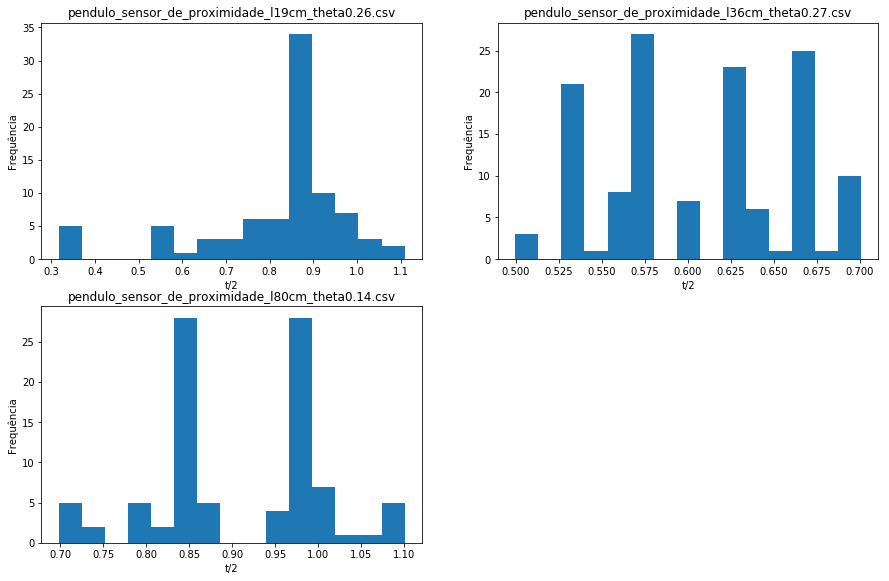

In [24]:
def estimativa(t,l,erroRelativo_t,erroRelativo_l):  #Funcao que calacula a propagação do erro para o calculo da gravidade             
    return (l*erroRelativo_t*2*np.pi**2)/(t**3) + erroRelativo_l*(np.pi/t)**2

fig = plt.figure(figsize=(15, 20))
place = [421, 422, 423, 424, 425, 426, 427]


             
gravidades = [(comprimentos[i]*4*np.pi**2)/((periodos[i])**2) for i in range(len(periodos))] #Calculando a gravidade de acordo com a amostra referente a cada comprmento  
intervalos = [] #Lista para os intervalos de confianaça para as gravidades
    
for arq, n, l, subp in zip(arquivos, range(len(arquivos)), comprimentos, place):
       
    N = len(amostra_periodos_e2[n])                                           #números de T/2 medidos (tamanho da amostra)
    mean = sum(amostra_periodos_e2[n])/N                                      #T/2 médio da amostra
    std = (sum([(q - mean)**2 for q in amostra_periodos_e2[n]])/(N-1))**0.5   #Desvio padrao amostral
    st_error = std/(N**0.5)                                                   #Erro padrao amostral
    erroRelativo_t = st_error/mean                                            #Erro relativo da amostra de T/2 
    erroRelativo_l = 0.01                                                     #Erro relativo do comprimento
    estimRelativa = estimativa(t=mean, l=l, erroRelativo_t=erroRelativo_t, erroRelativo_l=erroRelativo_l) #Calculo da propagação de erro para o calculo da gravidade
    
    intervalos.append([gravidades[n]*(1-estimRelativa), gravidades[n]*(1+estimRelativa)]) #Intervalos de confiança
    
    #Gera histograma
    subplot = fig.add_subplot(subp)
    subplot.hist(amostra_periodos_e2[n], bins=15)
    subplot.set(title=arq, xlabel='t/2', ylabel='Frequência')
    print('\t     Dados do arquivo: %s' %(arq))
    print('Média Amostral = %f, Desvio Padrão Amostral = %f,\nDesvio Padrão Amostral = %f, Erro Relativo = %f\n ' %(mean, std, st_error, erroRelativo_t))
    
    print('Gravidade calculada =', gravidades[n])
    print('Intervalo de confiança para a gravidade =', [gravidades[n]*(1-estimRelativa), gravidades[n]*(1+estimRelativa)])
    print('Erro estimado = %f%%\n' %(100*estimRelativa))
    print('--------------------------------------------------------------------------------\n')
    
plt.show()

### Comentários

Bons valores para gravidade foram encontrados nos experimentos com hastes de 36cm e 80cm, o que não ocorreu no experimento com haste de 19cm. Os erros continuaram grandes, entretanto o único intervalo de confiança no qual não abrange o valor tabelado da gravidade é o com haste de 19cm. O que era de se esperar pois foi encontrado um valor para gravidade de 2.78 nesse experimento, o que reforça a idéia de que era para ele ter sido descartado por inteiro, ou então ter seus dados melhor tratados uma vez que o sensor apresentou problemas na medição.

- Para cada comprimento:

In [25]:
#Achando a constante:
def f(t, a): return a*(2*t)**2      

amostra_periodos_e2_totais = []
for i in amostra_periodos_e2:
    amostra_periodos_e2_totais+=[np.mean(i)] 

constante = curve_fit(f,amostra_periodos_e2_totais, comprimentos)[0][0]

#Calculo da propagação do erro para a(t,l):
def estimativa(t,l,erroRelativo_t,erroRelativo_l):  #Funcao que calacula a propagação do erro para o calculo da gravidade  
    return l*erroRelativo_t/(2*(t**3)) +  erroRelativo_l/((2*t)**2)

#Calculo da gravidade a partir de a(t,l):
gravidade = constante*4*np.pi**2

N = len(amostra_periodos_e2_totais)                                                   #números de T/2 medidos (tamanho da amostra)
comprimento_medio = np.mean(comprimentos)                                             #comprimento médio
periodo_medio = np.mean(amostra_periodos_e2_totais)                                   #período médio (tamanho da amostra)
std = (sum([(q - periodo_medio)**2 for q in amostra_periodos_e2_totais])/(N-1))**0.5  #Desvio padrao amostral
st_error = std/(N**0.5)                                                               #Erro padrao amostral
erroRelativo_t = st_error/periodo_medio                                               #Erro relativo da amostra de T/2 
erroRelativo_l = 0.01             
estimRelativa = estimativa(periodo_medio, comprimento_medio, erroRelativo_t=erroRelativo_t, erroRelativo_l=erroRelativo_l)
intervalo = [(1-estimRelativa)*gravidade, (1+estimRelativa)*gravidade]

print('\t     Dados do arquivo: %s' %(arq))
print('Média Amostral = %f, Desvio Padrão Amostral = %f,\nDesvio Padrão Amostral = %f, Erro Relativo = %f\n ' %(periodo_medio, std, st_error, erroRelativo_t))

print('Gravidade calculada =', gravidade)
print('Intervalo de confiança para a gravidade =', intervalo)
print('Erro estimado = %f%%' %(100*estimRelativa))

	     Dados do arquivo: pendulo_sensor_de_proximidade_l80cm_theta0.14.csv
Média Amostral = 0.776685, Desvio Padrão Amostral = 0.152903,
Desvio Padrão Amostral = 0.088279, Erro Relativo = 0.113661
 
Gravidade calculada = 7.187078506443027
Intervalo de confiança para a gravidade = [6.76499925555568, 7.609157757330374]
Erro estimado = 5.872751%


### Comentários

O valor baixo para gravidade é devido ao experimento com a haste de 19cm. Entretanto o erro estimado ficou baixo, o que provavelmente se deve ao fato de tratar todos os experimentos como uma amostra única, mas sem descartar a idéia de que o cálculo do erro não foi realizado de maneira correta. Ainda sim, devido ao experimento problemático, conseguimos um valor baixo para a gravidade com erro pequeno, criando um intervalo de confiança no qual não abrange o valor tabelado para a gravidade ao mesmo tempo que mostra que o método produz um erro menor, assim sendo mais preciso.